In [167]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

## Read in Data Using Clipboard

In [3]:
df = pd.read_clipboard()

In [4]:
#df.head()

,Intel 4004,"2,300",1971,Intel,"10,000 nm",12 mm²
0,Intel 8008,"3,500",1972,Intel,"10,000 nm",14 mm²
1,Intel 8080,"4,500",1974,Intel,"6,000 nm",20 mm²
2,Motorola 6800,"4,100",1974,Motorola,"6,000 nm",16 mm²
3,RCA 1802,"5,000",1974,RCA,"5,000 nm",27 mm²
4,TMS 1000,"8,000",1974[7],Texas Instruments,"8,000 nm",NaN


## Write df to csv file and read in isolating x and y variables

In [5]:
#df.to_csv('moores.csv')

In [195]:
df = pd.read_csv('moores.csv', header=None, usecols=[2, 3], names=['transistor_count', 'year'])

In [196]:
df.head()

,transistor_count,year
0,"2,300",1971
1,"3,500",1972
2,"4,500",1974
3,"4,100",1974
4,"5,000",1974


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 2 columns):
transistor_count    102 non-null object
year                102 non-null object
dtypes: object(2)
memory usage: 1.7+ KB


In [198]:
df.describe()

,transistor_count,year
count,102,102
unique,98,43
top,"169,000,000",2012
freq,2,7


In [199]:
df.year.value_counts(dropna=False)

2012        7
2014        6
2010        6
1999        5
2007        5
2015        5
2008        5
2006        5
2013        4
1974        3
2003        3
2011        3
1995        2
2002        2
1985        2
1991        2
2005        2
2004        2
2000        2
1989        2
1997        2
1978        2
1988        2
1982        2
1979        2
1976        2
1986        1
1971        1
1998        1
2001        1
1993        1
2016        1
1983        1
1975        1
1985[13]    1
1987        1
1994        1
1974[7]     1
1984        1
1981        1
2009        1
1972        1
1996        1
Name: year, dtype: int64

In [200]:
df.transistor_count.value_counts(dropna=False)

169,000,000          2
1,400,000,000        2
7,500,000            2
29,000               2
592,000,000          1
                    ..
1,000,000,000[22]    1
47,000,000           1
1,900,000,000        1
3,100,000,000        1
1,180,235            1
Name: transistor_count, Length: 98, dtype: int64

## Find and Drop Two Cols in Year with Strange Values

In [201]:
df = df[~((df.year == '1985[13]') | (df.year == '1974[7]'))]

In [202]:
#df.year = df.year.astype(int)

## Find and Drop Cols in transistor_count with Strange Values

In [203]:
df.transistor_count = df.transistor_count.str.replace(',', '').str.replace('\[\d*\]', '', regex=True).str.replace('[^\d]', '', regex=True).astype(int)

In [204]:
df.transistor_count.value_counts()

1400000000    3
7500000       2
1000000000    2
5000000000    2
1200000000    2
             ..
42000000      1
2750000000    1
2500000       1
30000         1
8800000       1
Name: transistor_count, Length: 89, dtype: int64

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 101
Data columns (total 2 columns):
transistor_count    100 non-null int64
year                100 non-null object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


## Create X and y Variables

In [206]:
X = df.year

In [207]:
y = df.transistor_count

In [208]:
X.head(2)

0    1971
1    1972
Name: year, dtype: object

In [209]:
y.head(2)

0    2300
1    3500
Name: transistor_count, dtype: int64

## Split Train and Test

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, train_size=.7)

In [211]:
X_train.shape

(70,)

In [212]:
y_train.shape

(70,)

In [213]:
X_test.shape

(30,)

In [214]:
y_test.shape

(30,)

## Explore Train Data

### The relationship is exponential

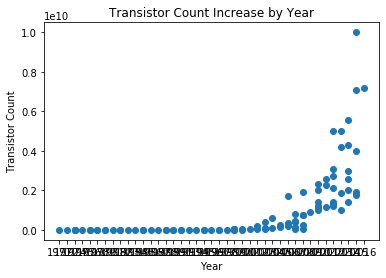

In [216]:
plt.scatter(X, y)
plt.xlabel('Year')
plt.ylabel('Transistor Count')
plt.title('Transistor Count Increase by Year')

plt.show()

### Use the log of y to make it linear

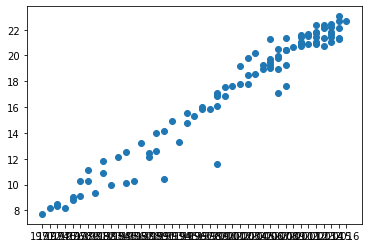

In [217]:
plt.scatter(x=X, y=np.log(y))

plt.show()

### Check the distribution of transistor_count

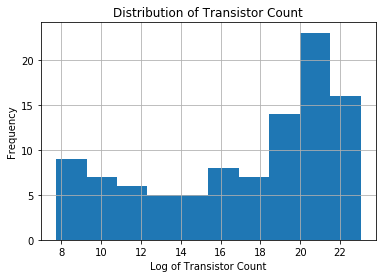

In [222]:
np.log(y).hist()
plt.ylabel('Frequency')
plt.xlabel('Log of Transistor Count')
plt.title('Distribution of Transistor Count')

plt.show()

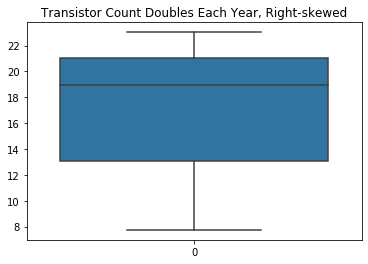

In [227]:
sns.boxplot(data=np.log(y))
plt.title('Transistor Count Doubles Each Year, Right-skewed')

plt.show()